In [102]:
#!pip install numpy 
#pip install -U matplotlib
#!pip install random
#!pip install scipy
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import time

In [80]:
def exclude_range(indices, start, end):
    
    excluded_indices = [i for i in indices if i >= start and i <= end]
    return [i for i in indices if i not in excluded_indices]

In [81]:
def Bimodality(theta, n):
    
    tet = []
    
    for i in range(n):
        
        for j in range(n):
            
            tet.append(theta[i][j])
   

    cos = np.cos(tet)  
    sk = skew(cos)
    #print(sk)
    kt = kurtosis(cos, fisher=False)
    kurt = (kt) + 3*((n**2) +1)/(((n**2)-2)*((n**2)-3))
    #print(kurt)
    Beta = ((sk)**2 + 1)/kurt
    return Beta, kt

In [82]:
def Polarity_param(theta, n):
    
    tet = np.array([(np.cos(theta)), (np.sin(theta))])
    
    x_tot = 0
    y_tot = 0
    
    for i in range(n):
        
        x = sum(tet[0, i])
        #print(x)
        y = sum(tet[1, i])
        #print(y)
        x_tot += x
        y_tot += y
        
    Polarity_parameter = (1/n**2)*((x_tot)**2 + (y_tot)**2)**(1/2)
    
    return Polarity_parameter


In [83]:

def Bipolarity_param(theta, n):
    
    tet = np.array([(np.cos(2*theta)), (np.sin(2*theta))])
    
    x_tot = 0
    y_tot = 0
    
    for i in range(n):
        
        x = sum(tet[0, i])
        #print(x)
        y = sum(tet[1, i])
        #print(y)
        x_tot += x
        y_tot += y
        
    Bipolarity_parameter = (1/n**2)*((x_tot)**2 + (y_tot)**2)**(1/2)
    
    return Bipolarity_parameter


In [106]:
def Tripolarity_param(theta, n):
    
    tet = np.array([(np.cos(3*theta)), (np.sin(3*theta))])
    
    x_tot = 0
    y_tot = 0
    
    for i in range(n):
        
        x = sum(tet[0, i])
        #print(x)
        y = sum(tet[1, i])
        #print(y)
        x_tot += x
        y_tot += y
        
    Bipolarity_parameter = (1/n**2)*((x_tot)**2 + (y_tot)**2)**(1/2)
    
    return Bipolarity_parameter


In [107]:
def Quadpolarity_param(theta, n):
    
    tet = np.array([(np.cos(4*theta)), (np.sin(4*theta))])
    
    x_tot = 0
    y_tot = 0
    
    for i in range(n):
        
        x = sum(tet[0, i])
        #print(x)
        y = sum(tet[1, i])
        #print(y)
        x_tot += x
        y_tot += y
        
    Bipolarity_parameter = (1/n**2)*((x_tot)**2 + (y_tot)**2)**(1/2)
    
    return Bipolarity_parameter

In [84]:

# Initialized random opinions with boundary conditions included.

def BoundaryConditions(Distribution):
    x = np.zeros((n, n))
    x[2:-2,2:-2] = Distribution
    x[0,:] = (0)*np.pi
    x[1,:] = (0)*np.pi
    x[:,0] = (1)*np.pi
    x[:,1] = (1)*np.pi
    x[n-1,:] = (1)*np.pi
    x[n-2,:] = (1)*np.pi
    x[:,n-1] = (0)*np.pi
    x[:,n-2] = (0)*np.pi
    return x


In [85]:
# !!!!!!!!!! Models fixed opinions inside latticte to replicate news sources/ populists of particular opinions
# !!!!!!!!!! or political affiliations. Also implements boundary conditions.

def News(k, Leads, Orient): # Leads is an array of 2D coordinates of all the leaders/News sources.
    
    size = np.size(Leads)/2
    sums = 0
    i = 0
    
    while i < size:
        
        point = Leads[i]
        #print(point)
        k[point[0]][point[1]] = Orient[i]
        
        i +=1
        
    k[0,:] = (0)*np.pi
    k[1,:] = (0)*np.pi
    k[:,0] = (1)*np.pi
    k[:,1] = (1)*np.pi
    k[n-1,:] = (1)*np.pi
    k[n-2,:] = (1)*np.pi
    k[:,n-1] = (0)*np.pi
    k[:,n-2] = (0)*np.pi
    
    return k
        

In [86]:
n = 6
Leads = np.array([[2,2],[3,3], [3,2]])
Orient = np.array([3, 2, 1])
k = BoundaryConditions(initial_opinions(n))
print(k)
news = News(k, Leads, Orient)
dis = initial_opinions(n)
print(news)

[[ 3.14159265  3.14159265  0.          0.          0.          0.        ]
 [ 3.14159265  3.14159265  0.          0.          0.          0.        ]
 [ 3.14159265  3.14159265 -0.30608259  0.18682731  0.          0.        ]
 [ 3.14159265  3.14159265  1.07237052 -0.28554114  0.          0.        ]
 [ 3.14159265  3.14159265  3.14159265  3.14159265  0.          0.        ]
 [ 3.14159265  3.14159265  3.14159265  3.14159265  0.          0.        ]]
[[3.14159265 3.14159265 0.         0.         0.         0.        ]
 [3.14159265 3.14159265 0.         0.         0.         0.        ]
 [3.14159265 3.14159265 3.         0.18682731 0.         0.        ]
 [3.14159265 3.14159265 1.         2.         0.         0.        ]
 [3.14159265 3.14159265 3.14159265 3.14159265 0.         0.        ]
 [3.14159265 3.14159265 3.14159265 3.14159265 0.         0.        ]]


In [87]:
def angle_diff(v1, v2):
    
    unit_vector_1 = v1 
    unit_vector_2 = v2 
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    
    if dot_product < 0:
        
        dot_product = dot_product + 0.000000000000001
                
    if dot_product > 0:
        
        dot_product = dot_product - 0.000000000000001
    
    angle = np.arccos(dot_product) 
    
    return angle
    

In [88]:
x = [-1,0]
y = [1,0]
angle_diff(x,y)

3.1415926088863095

In [89]:

def MeanOpinions1(theta, x, y, R, alpha):
    
    sinsum0 = 0
    cossum0 = 0
    g = 0
    
    
    for i in range(x-R, x+R+1):
        
        for j in range(y-R, y+R+1):
                
            vector_neighbour = np.array([np.cos(theta[i][j]), np.sin(theta[i][j])])
            #print(vector_neighbour)
            vector_centre = np.array([np.cos(theta[x][y]), np.sin(theta[x][y])])
            #print(vector_centre)
            angle = angle_diff(vector_neighbour, vector_centre)
            #print(angle)
                
            if angle < alpha:
                    
                sinsum0 += np.sin(theta[i][j])
                cossum0 += np.cos(theta[i][j])
                g += 1
                #print(g)
            else:
                continue
                
    sum0 = np.arctan2(sinsum0, cossum0)

    return sum0

In [90]:
theta = np.array([[0,0,0,0,0,0],
                 [0,0,0,0,0,0],
                 [0,0,np.pi/2,np.pi,0,0],
                 [0,0,-np.pi/2,0,0,0],
                 [0,0,0,0,0,0],
                 [0,0,0,0,0,0]])

a = MeanOpinions1(theta, 2, 2, 2, 2)
print(a)

0.0475831032769834


In [91]:
def MeanOpinions2(theta, x, y, R, alpha): # Used for Weighted leaders function!!!!!!!!!!!!!!!!!!
    
    sinsum02 = 0
    cossum02 = 0
    #g = 0
    
    for i in range(x-R, x+R+1):
        
        for j in range(y-R, y+R+1):
                
            vector_neighbour = np.array([np.cos(theta[i][j]), np.sin(theta[i][j])])
            #print(vector_neighbour)
            vector_centre = np.array([np.cos(theta[x][y]), np.sin(theta[x][y])])
            #print(vector_centre)
            angle = angle_diff(vector_neighbour, vector_centre)
            #print(angle)
                
            if angle < alpha:
                    
                sinsum02 += np.sin(theta[i][j])
                cossum02 += np.cos(theta[i][j])
                #g += 1
                #print(g)
            else:
                continue
                
    sum0 = (sinsum02, cossum02)

    return sum0

In [92]:
def MeanRandom_Influence(theta, x, y, alpha, NL): # Use this function to take into account lack of constraints on 
                                                  # location/geography/lattice structure of neighbours
    rsinsum0 = 0
    rcossum0 = 0
    #rg = 0
    
    for i in range(NL):
        
        Lead = np.random.randint(2, high = (n-1), size = (2))
        #print(i)
        xL = Lead[0]
        yL = Lead[1]
           
        vector_neighbour = np.array([np.cos(theta[xL][yL]), np.sin(theta[xL][yL])])
        vector_centre = np.array([np.cos(theta[x][y]), np.sin(theta[x][y])])
        angle = angle_diff(vector_neighbour, vector_centre)
        #print(h)
        #print(angle_diff)
        if angle < alpha:
                
            rsinsum0 += np.sin(theta[xL][yL])
            rcossum0 += np.cos(theta[xL][yL])
            #rg += 1
                #print(g)
        else:
            continue
        
    #print(rg)
    sums = (rsinsum0, rcossum0)
    
    return sums

In [93]:
np.random.randint(2, 4, size = (2))

array([3, 3])

In [94]:
def MeanOpinionsRandomInfluence(theta, x, y, R, alpha):
    
    sinsum0 = 0
    cossum0 = 0
    #g = 0
    
    for i in range(x-R, x+R+1):
        #print(x-R, x+R)
        for j in range(y-R, y+R+1):
            
            #print(y-R, y+R)   
            vector_neighbour = np.array([np.cos(theta[i][j]), np.sin(theta[i][j])])
            vector_centre = np.array([np.cos(theta[x][y]), np.sin(theta[x][y])])
            
            angle = angle_diff(vector_neighbour, vector_centre)
                
            #print(h)   
            #print(h)
            #print(angle_diff)
                
            if angle < alpha:
                    
                sinsum0 += np.sin(theta[i][j])
                cossum0 += np.cos(theta[i][j])
                g += 1
                #print(g)
                
            else:
                continue
            
               
    (r0sinsum, r0cossum) = MeanRandom_Influence(theta, x, y, alpha, NL)
    #tg = g + rgsum
    
    sum0 = np.arctan2((sinsum0 + r0sinsum), (cossum0+r0cossum))
    
        
    #print(Average)
    return sum0

In [95]:
!!!!!!!! # Weighted leaders function !!!!!!!!!!!!!!!!

def MeanOpinions_WeightedLeaders(theta, x, y, RL, alpha, Lead, weight):
    
    sinsum0 = 0
    cossum0 = 0
    #g = 0
    
    for i in range(NL):
        
        #print(i)
        xL = Lead[i][0]
        yL = Lead[i][1]
        rabsx = abs(x-xL)
        rabsy = abs(y-yL)
        #print(i, j)
        #print(absx, absy)
        rneighboursx =  rabsx <= RL 
        rneighboursy =  rabsy <= RL
        #print(neighboursx, neighboursy)
        if (rneighboursx, rneighboursy) == (True, True):
            
            vector_neighbour = np.array([np.cos(theta[xL][yL]), np.sin(theta[xL][yL])])
            vector_centre = np.array([np.cos(theta[x][y]), np.sin(theta[x][y])])
            
            angle = angle_diff(vector_neighbour, vector_centre)
            #print(h)
            #print(angle_diff)
            if angle < alpha:
                
                sinsum0 += weight*np.sin(theta[xL][xL])
                cossum0 += weight*np.cos(theta[xL][xL])
                #g += weight
                    #print(g)
            else:
                continue
        else:
            continue
    #print(rg)
    
    (r0sinsum, r0cossum) = MeanOpinions2(theta, x, y, R, alpha)
    #tg = g + rgsum
    sum0 = np.arctan2((sinsum0 + r0sinsum), (cossum0+r0cossum))
    
        
    #print('angle =', Average)
    return sum0

In [96]:
!!!!!! # With added periodic boundary conditions !!!!!!
def MeanOpinions_Periodic_BoundaryCond(theta, x, y, R, alpha):
    
    sinsum0 = 0
    cossum0 = 0
    g = 0
    
    
    for i in range(x-R, x+R+1):
        
        if i>=n:
            i -= n
                
        elif i<0:
            i += n
        
        
        for j in range(y-R, y+R+1):
            
            if j>=n:
                j -= n
                
            elif j<0:
                j += n
            #print(i,j)    
                
            vector_neighbour = np.array([np.cos(theta[i][j]), np.sin(theta[i][j])])
            vector_centre = np.array([np.cos(theta[x][y]), np.sin(theta[x][y])])
                    
            angle = angle_diff(vector_neighbour, vector_centre)
            #print(h)
            #print(i,j, theta[i][j])
                
            if angle < alpha:
                    
                sinsum0 += np.sin(theta[i][j])
                cossum0 += np.cos(theta[i][j])
                g += 1
                #print(g)
            else:
                continue
                
    #print(g)
    sum0 = np.arctan2(sinsum0/g, cossum0/g)
    
    return sum0

In [97]:
def initial_opinions(n):
    
    init = np.zeros((n-4,n-4))
    
    for i in range(n-4):
        
        for j in range(n-4):
            
            init[i][j] += np.pi*np.random.uniform(-1,1,1)
            
    return init
        

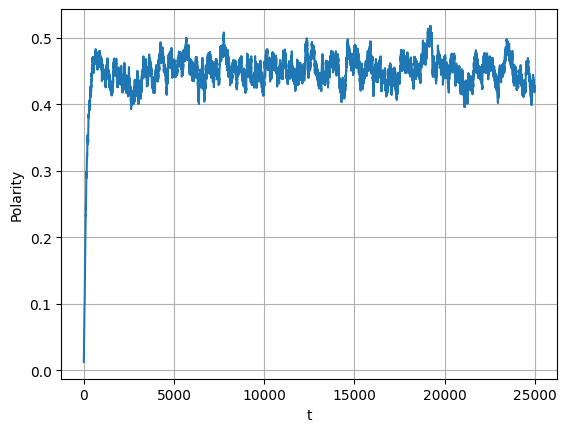

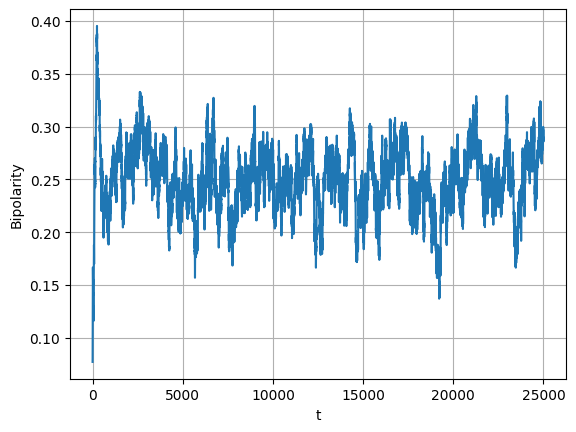

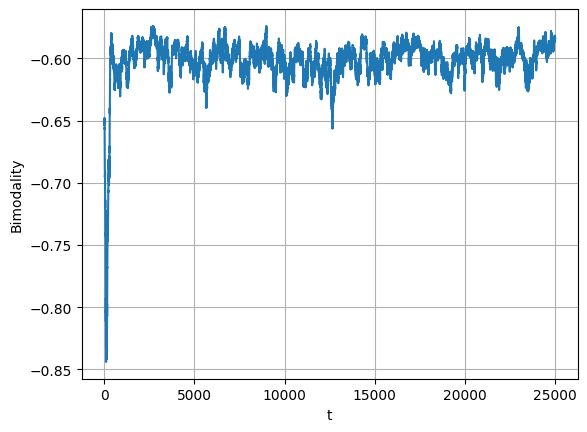

Polarity = 0.42420694087340993
Bipolarity = 0.28933000904527173
Bimodality = -0.5838177541686008


In [20]:
!!!!!!! # Base Model !!!!!!!!!!!!!!!! 
n = 100
#ret = np.load('1theta_matrices3.npy')
c = initial_opinions(n) #ret[9999][2:-2,2:-2]
#print(c)
#print(c) # random uniform distribution of angles/opinions
eta = 0.18*np.pi
theta = BoundaryConditions(c)
Nt = 25000
R = 2 ## 24 neighbours
alpha = 0.3*np.pi
#print(theta)
theta_iterations = []
Bimod_iter = []
pol_iter = []
bipol_iter = []
kerts_iter = []

t = 0

while t < Nt:
    NewTheta = BoundaryConditions(0)
    #print(t)
    a = 2
    while a < n-2:
        b = 2
        while b < n-2:
            
            mean = MeanOpinions1(theta, a, b, R, alpha)
            #print(mean)    
            UpdateOp = mean + eta*(np.random.uniform(-1,1))
            
            if UpdateOp < -np.pi:
                
                UpdateOp = UpdateOp + 2*np.pi
                
            if UpdateOp > np.pi:
                
                UpdateOp = UpdateOp - 2*np.pi
                
            #print(UpdateOp)
            NewTheta[a][b] += UpdateOp
            #print(NewTheta)
            #print(a,b)
            b+=1
        
        a+=1
    
    pol = Polarity_param(NewTheta, n)
    pol_iter.append(pol)
    
    bipol = Bipolarity_param(NewTheta, n)
    bipol_iter.append(bipol)
    
    Bimod = Bimodality(NewTheta, n)
    Bimod_iter.append(Bimod[0])
    kerts_iter.append(Bimod[1])
    
    app = t%10
    
    theta = NewTheta
    
    if app == 0:
        
        theta_iterations.append(theta)
        
    t += 1
    print("\r{}".format(t), end="")
    time.sleep(1)
    
np.save('2theta_matrices30.npy', theta_iterations) 
np.savetxt('2Polarity_list30.csv', pol_iter, delimiter=',')
np.savetxt('2Bipolarity_list30.csv', bipol_iter, delimiter=',')
np.savetxt('2Bimodality_list30.csv', Bimod_iter, delimiter=',')
np.savetxt('2Kurtosis_list30.csv', kerts_iter, delimiter=',')


#Display(theta)
np.histogram(theta)
#plt.hist(theta, 20)
#plt.show()

np.histogram(theta[2:-2,2:-2])
#plt.hist(theta[2:-2,2:-2], 20)
#plt.show()

t = np.linspace(1, Nt, Nt)

plt.plot(t, pol_iter)
plt.xlabel('t')
plt.ylabel('Polarity')
plt.grid()
plt.show()
plt.plot(t, bipol_iter)
plt.xlabel('t')
plt.ylabel('Bipolarity')
plt.grid()
plt.show()
plt.plot(t, Bimod_iter)
plt.xlabel('t')
plt.ylabel('Bimodality')
plt.grid()
plt.show()

pol = Polarity_param(theta, n)
print('Polarity =', pol)
bipol = Bipolarity_param(theta, n)
print('Bipolarity =', bipol)

Bimod = Bimodality(theta, n)
print('Bimodality =', Bimod)



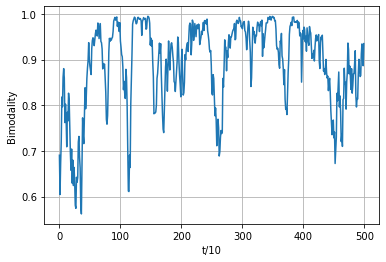

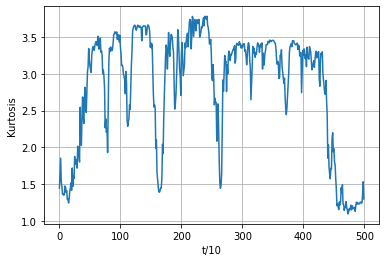

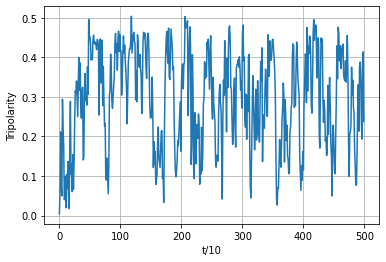

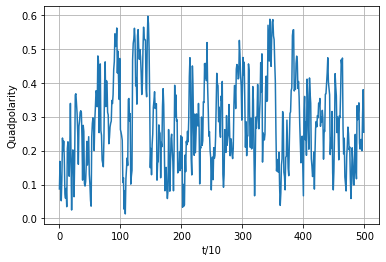

In [112]:

ret = np.load('4theta_matrices5.0.npy')
r = []
k = []
t = []
q = []
n = 100
i = 0
while i < 500:
    
    tri = Tripolarity_param(ret[i], n)
    quad = Quadpolarity_param(ret[i], n)
    t.append(tri)
    q.append(quad)
    
    
    bi = Bimodality(ret[i], n)
    bim = bi[0]
    kert = bi[1]
    r.append(bim)
    k.append(kert)
    
    i += 1
    
plt.plot(r)
plt.xlabel('t/10')
plt.ylabel('Bimodality')
plt.grid()
plt.show()
plt.plot(k)
plt.xlabel('t/10')
plt.ylabel('Kurtosis')
plt.grid()
plt.show()
plt.plot(t)
plt.xlabel('t/10')
plt.ylabel('Tripolarity')
plt.grid()
plt.show()
plt.plot(q)
plt.xlabel('t/10')
plt.ylabel('Quadpolarity')
plt.grid()
plt.show()
#np.savetxt('2Bimodality_list24.2.csv', r, delimiter=',')
#np.savetxt('2Kurtosis_list24.2.csv', k, delimiter=',')

In [ ]:
!!!!!!!!!!!!!! # Added random influences from far away elements # !!!!!!!!

n = 100 # dimension of lattice. n^2 = number of opinions
#ret = np.load('3theta_matrices4.5.npy')
#c = ret[999][2:-2,2:-2] #initial_opinions(n)
#print(c)
NL = 2 # Number of random influence elements per iteration.
c = initial_opinions(n) # Initial opinions
eta = 0.12*np.pi # noise term scaling factor
theta = BoundaryConditions(c) # Adding boundaries
#print(theta)
Nt = 40000 # Number of time steps
R = 2  # Range of neighbours
alpha = 0.15*np.pi 
#print(theta)

#Display(theta) 

theta_iterations = []
Bimod_iter = []
pol_iter = []
bipol_iter = []
kerts_iter = []

t = 0

while t < Nt:
    NewTheta = BoundaryConditions(0)
    #print(NewTheta)
    a = 2
    while a < n-2:
        b = 2
        while b < n-2:
            
            noise = np.random.uniform(-1,1,1)
            UpdateOp = MeanOpinionsRandomInfluence(theta, a, b, R, alpha) + eta*(noise)
            #print(noise)
            NewTheta[a][b] += UpdateOp
            #print(NewTheta)
            #print(a,b)
            b+=1
        
        a+=1
    
    #Display(theta)    
    #print(theta)
    theta = NewTheta
    
    pol = Polarity_param(theta, n)
    pol_iter.append(pol)
    
    bipol = Bipolarity_param(theta, n)
    bipol_iter.append(bipol)
    
    Bimod = Bimodality(theta, n)
    Bimod_iter.append(Bimod[0])
    kerts_iter.append(Bimod[1])
    
    app = t%10
    
    if app == 0:
        
        theta_iterations.append(theta)
        
    t += 1
    print("\r{}".format(t), end="")
    time.sleep(1)
    
np.save('3theta_matrices4.6.npy', theta_iterations) 
np.savetxt('3Polarity_list4.6.csv', pol_iter, delimiter=',')
np.savetxt('3Bipolarity_list4.6.csv', bipol_iter, delimiter=',')
np.savetxt('3Bimodality_list4.6.csv', Bimod_iter, delimiter=',')
np.savetxt('3Kurtosis_list4.6.csv', kerts_iter, delimiter=',')


#Display(theta)
np.histogram(theta)
#plt.hist(theta, 20)
#plt.show()

np.histogram(theta[2:-2,2:-2])
#plt.hist(theta[2:-2,2:-2], 20)
#plt.show()

t = np.linspace(1, Nt, Nt)

plt.plot(t, pol_iter)
plt.xlabel('t')
plt.ylabel('Polarity')
plt.grid()
plt.show()
plt.plot(t, bipol_iter)
plt.xlabel('t')
plt.ylabel('Bipolarity')
plt.grid()
plt.show()
plt.plot(t, Bimod_iter)
plt.xlabel('t')
plt.ylabel('Bimodality')
plt.grid()
plt.show()

pol = Polarity_param(theta, n)
print('Polarity =', pol)
bipol = Bipolarity_param(theta, n)
print('Bipolarity =', bipol)

Bimod = Bimodality(theta, n)
print('Bimodality =', Bimod)
        
#print(theta)
Display(theta)

5

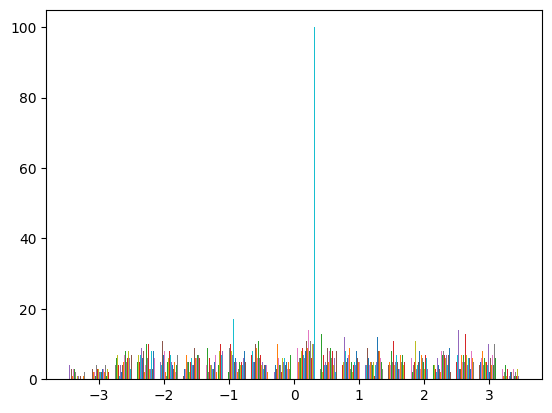

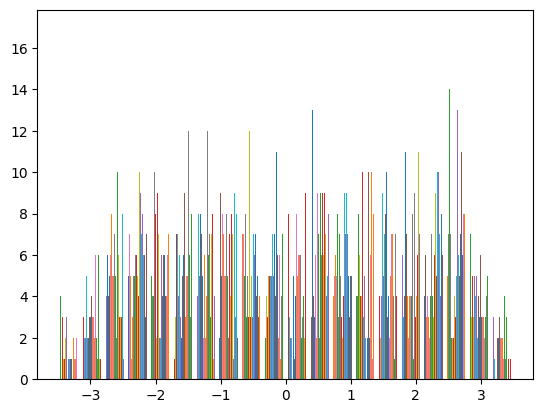

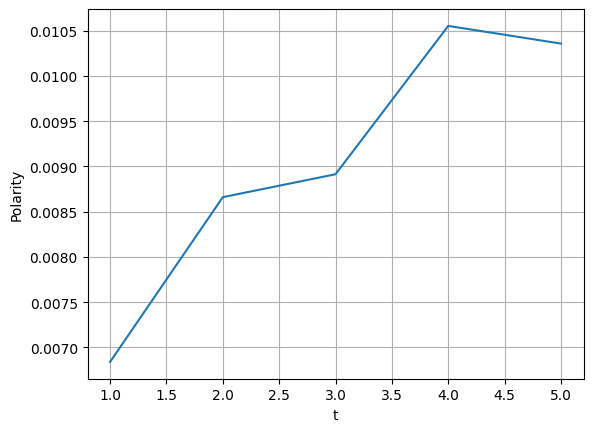

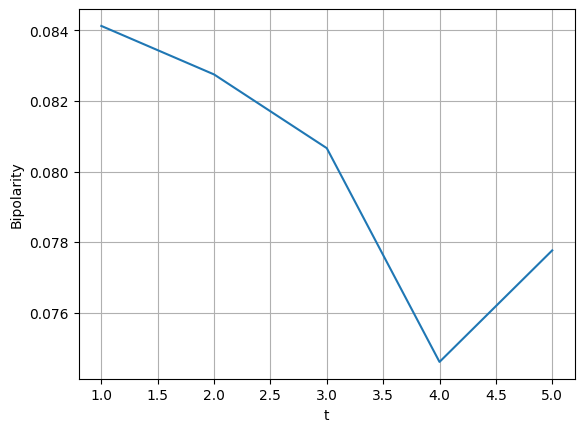

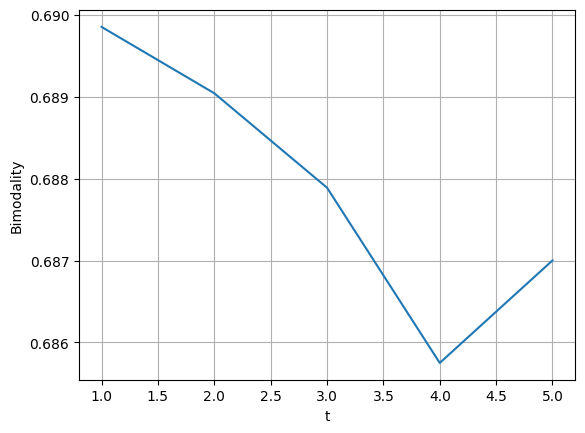

Polarity = 0.01035697061542378
Bipolarity = 0.07776571501192661
Bimodality = 0.6870009503383888


In [67]:
!!!!!!!!!!!!!! # Added Leaders of different weighting # !!!!!!!!

n = 100 # dimension of lattice. n^2 = number of opinions
NL = 9 # Number of leaders
c = initial_opinions(n) # Initial opinions
eta = 0.12*np.pi # noise term scaling factor
theta = BoundaryConditions(c) # Adding boundaries
Nt = 5 # Number of time steps
R = 2  # Range of neighbours
RL = 10 # Range of leaders 
alpha = 0.15*np.pi 
Lead = np.random.randint(2, high = (n-1), size = (NL, 2))
np.savetxt('4Leader_locations5.0.csv', Lead, delimiter=',')
weight = 1 # Weight of opinion leaders

t = 0

theta_iterations = []
Bimod_iter = []
pol_iter = []
bipol_iter = []
kerts_iter = []

while t < Nt:
    
    NewTheta = BoundaryConditions(0)
    
    a = 2
    
    while a < n-2:
        b = 2
        while b < n-2:
            
            noise = np.random.uniform(-1,1,1)
            
            UpdateOp = MeanOpinions_WeightedLeaders(theta, a, b, RL, alpha, Lead, weight) + eta*(noise)
            
            NewTheta[a][b] += UpdateOp
            
            b+=1
        
        a+=1
    
    theta = NewTheta
    
    pol = Polarity_param(theta, n)
    pol_iter.append(pol)
    
    bipol = Bipolarity_param(theta, n)
    bipol_iter.append(bipol)
    
    Bimod = Bimodality(theta, n)
    Bimod_iter.append(Bimod[0])
    kerts_iter.append(Bimod[1])
    
    app = t%100
    
    if app == 0:
        
        theta_iterations.append(theta)
        
    t += 1
    print("\r{}".format(t), end="")
    time.sleep(1)
    
np.save('4theta_matrices5.0.npy', theta_iterations) 
np.savetxt('4Polarity_list5.0.csv', pol_iter, delimiter=',')
np.savetxt('4Bipolarity_list5.0.csv', bipol_iter, delimiter=',')
np.savetxt('4Bimodality_list5.0.csv', Bimod_iter, delimiter=',')
np.savetxt('4Kurtosis_list5.0.csv', kerts_iter, delimiter=',')

np.histogram(theta)
plt.hist(theta, 20)
plt.show()

np.histogram(theta[2:-2,2:-2])
plt.hist(theta[2:-2,2:-2], 20)
plt.show()

t = np.linspace(1, Nt, Nt)

plt.plot(t, pol_iter)
plt.xlabel('t')
plt.ylabel('Polarity')
plt.grid()
plt.show()
plt.plot(t, bipol_iter)
plt.xlabel('t')
plt.ylabel('Bipolarity')
plt.grid()
plt.show()
plt.plot(t, Bimod_iter)
plt.xlabel('t')
plt.ylabel('Bimodality')
plt.grid()
plt.show()

pol = Polarity_param(theta, n)
print('Polarity =', pol)
bipol = Bipolarity_param(theta, n)
print('Bipolarity =', bipol)

Bimod = Bimodality(theta, n)
print('Bimodality =', Bimod)
        

10

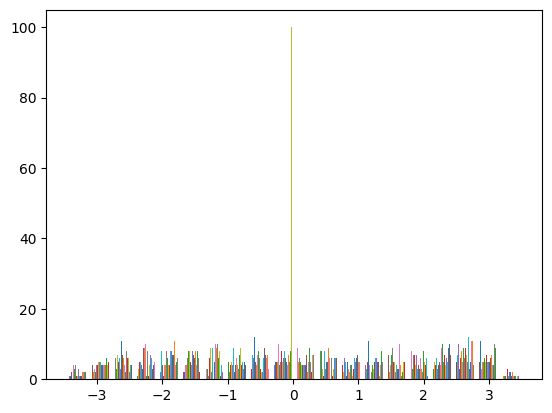

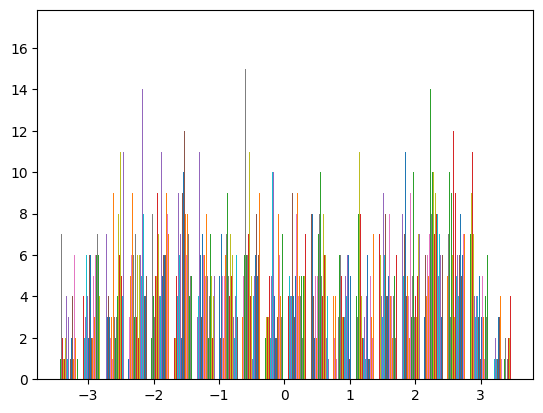

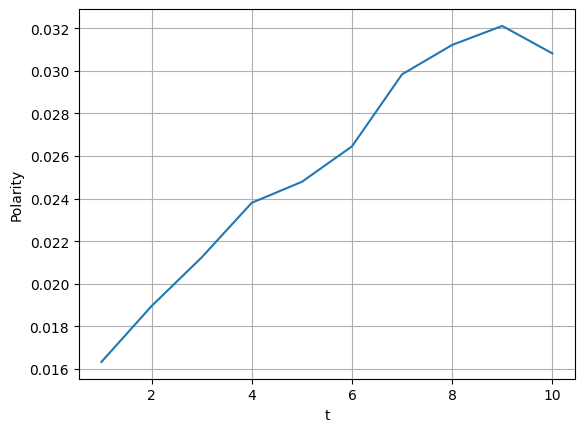

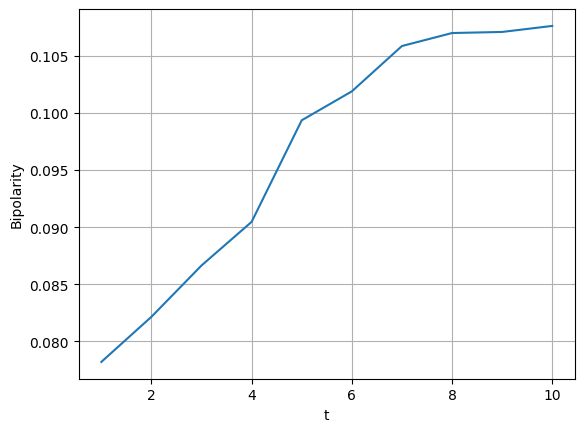

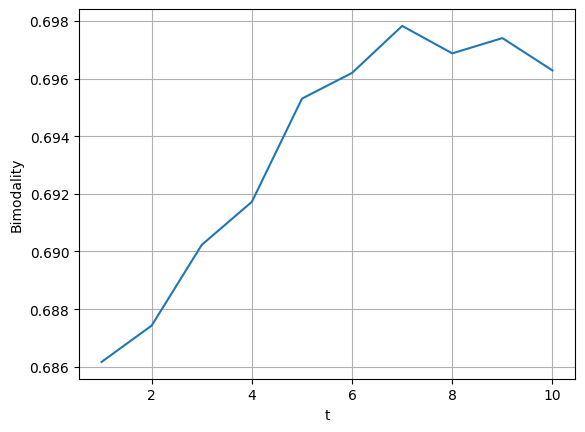

Polarity = 0.030821987883107586
Bipolarity = 0.10761026460939868
Bimodality = (0.6962818729051656, 1.4441708172486956)


In [21]:
!!!!!!!!!!!!!! # Added Leaders of different weighting and FIXED OPINIONS # !!!!!!!!

n = 100 # dimension of lattice. n^2 = number of opinions
NL = 3 # Number of leaders
Orient = np.array([np.pi/2, np.pi/2, np.pi/2])
c = initial_opinions(n) # Initial opinions
eta = 0.12*np.pi # noise term scaling factor
theta = BoundaryConditions(c) # Adding boundaries
#print(theta)
Nt = 10 # Number of time steps
R = 2  # Range of neighbours
RL = 10 # Range of leaders 
alpha = 0.15*np.pi 
#print(theta)
Leads = np.random.randint(2, high = (n-1), size = (NL, 2))
#np.savetxt('5Leader_locations1.1.csv', Lead, delimiter=',')
weight = 1 # Weight of opinion leaders

t = 0

theta_iterations = []
Bimod_iter = []
pol_iter = []
bipol_iter = []
kerts_iter = []

while t < Nt:
    
    NewTheta = BoundaryConditions(0)
    #print(NewTheta)
    a = 2
    while a < n-2:
        b = 2
        while b < n-2:
            
            noise = np.random.uniform(-1,1,1)
            
            UpdateOp = MeanOpinions_WeightedLeaders(theta, a, b, RL, alpha, Leads, weight) + eta*(noise)
            
            NewTheta[a][b] += UpdateOp
            
            b+=1
        
        a+=1
    
    theta = News(NewTheta, Leads, Orient)
    
    pol = Polarity_param(theta, n)
    pol_iter.append(pol)
    
    bipol = Bipolarity_param(theta, n)
    bipol_iter.append(bipol)
    
    Bimod = Bimodality(theta, n)
    Bimod_iter.append(Bimod[0])
    kerts_iter.append(Bimod[1])
    
    app = t%10
    
    if app == 0:
        
        theta_iterations.append(theta)
        
    t += 1
    print("\r{}".format(t), end="")
    time.sleep(1)
    
np.save('5theta_matrices1.1.npy', theta_iterations)
np.savetxt('5Polarity_list1.1.csv', pol_iter, delimiter=',')
np.savetxt('5Bipolarity_list1.1.csv', bipol_iter, delimiter=',')
np.savetxt('5Bimodality_list1.1.csv', Bimod_iter, delimiter=',')
np.savetxt('5Kurtosis_list1.1.csv', kerts_iter, delimiter=',')



np.histogram(theta)
plt.hist(theta, 20)
plt.show()

np.histogram(theta[2:-2,2:-2])
plt.hist(theta[2:-2,2:-2], 20)
plt.show()

t = np.linspace(1, Nt, Nt)

plt.plot(t, pol_iter)
plt.xlabel('t')
plt.ylabel('Polarity')
plt.grid()
plt.show()
plt.plot(t, bipol_iter)
plt.xlabel('t')
plt.ylabel('Bipolarity')
plt.grid()
plt.show()
plt.plot(t, Bimod_iter)
plt.xlabel('t')
plt.ylabel('Bimodality')
plt.grid()
plt.show()

pol = Polarity_param(theta, n)
print('Polarity =', pol)
bipol = Bipolarity_param(theta, n)
print('Bipolarity =', bipol)

Bimod = Bimodality(theta, n)
print('Bimodality =', Bimod)


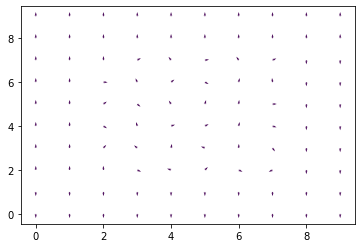

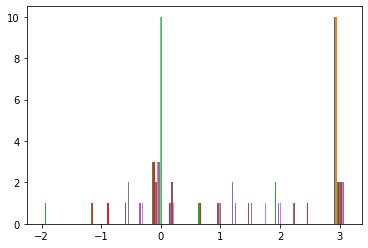

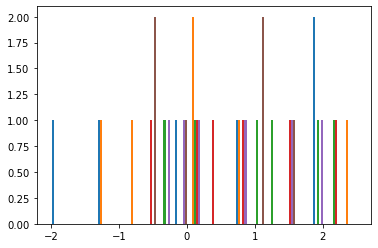

Polarity = 0.5092683318609875
Bipolarity = 0.0620526789524898
Bimodality = -1.5677360509415021


In [44]:
!!!!!! # Each individual given their own openess/noise level !!!!!!!!!!!!!!!!

n = 10
c = initial_opinions(n)  # random uniform distribution of angles/opinions
eta_scale = 1*np.pi
open_level = np.pi * np.random.rand(n,n) # Each individual has their own level of openess/noise
theta = BoundaryConditions(c) # Adding boundary conditions
Nt = 50
R = 2
alpha = 1*np.pi
#print(theta)
t = 0 

while t < Nt:
    NewTheta = BoundaryConditions(0)
    #print(NewTheta)
    a = 2
    while a < n-2:
        b = 2
        while b < n-2:
            
            
            mean = MeanOpinions(theta, a, b, R, alpha)[0]
                
            UpdateOp = mean + rnad*open_level[a][b]*(np.random.uniform(-1,1,1))
            
            if UpdateOp < -np.pi:
                
                UpdateOp = UpdateOp + 2*np.pi
                
            if UpdateOp > np.pi:
                
                UpdateOp = UpdateOp - 2*np.pi
                
            #print(UpdateOp)
            NewTheta[a][b] += UpdateOp
            #print(NewTheta)
            #print(a,b)
            b+=1
        
        a+=1
    
    theta = NewTheta

    
    
np.savetxt('data2.csv', theta, delimiter=',')
        
#print(theta)
Display(theta)
np.histogram(theta)
plt.hist(theta, 20)
plt.show()

np.histogram(theta[2:-2,2:-2])
plt.hist(theta[2:-2,2:-2], 20)
plt.show()


pol = Polarity_param(theta[2:-2,2:-2], n-4)
print('Polarity =', pol)
bipol = Bipolarity_param(theta[2:-2,2:-2], n-4)
print('Bipolarity =', bipol)

Bimod = Bimodality(theta[2:-2,2:-2], n-4)
print('Bimodality =', Bimod)

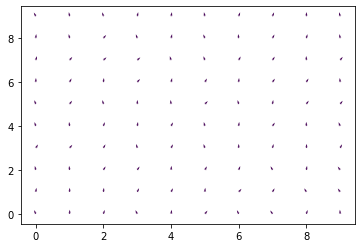

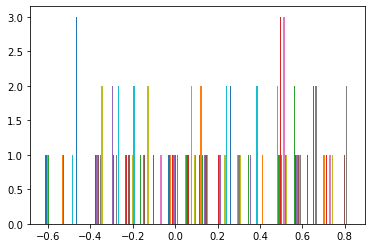

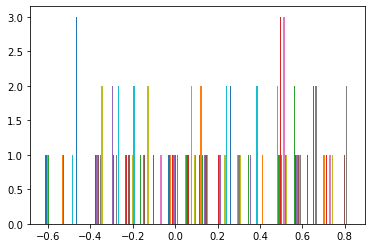

Polarity = 0.9260046577001816
Bipolarity = 0.7243213952131922
Bimodality = -0.899500759312347


In [47]:
!!!!!!! # Base Model with periodic boundary conditions !!!!!!!!!!!!!!!! test for order eta = 0.3pi, alpha = 0.8 pi
n = 10
theta = initial_opinions(n+4)  # random uniform distribution of angles/opinions
eta = 0.2*np.pi
Nt = 50
R = 2
alpha = 0.8*np.pi
#print(theta)
t = 0

while t < Nt:
    NewTheta = np.zeros((n,n))
    #print(NewTheta)
    a = 0
    while a < n:
        b = 0
        while b < n:
            
            
            mean = MeanOpinions_BoundaryCond(theta, a, b, R, alpha)[0]
                
            UpdateOp = mean + eta*(np.random.uniform(-1,1,1))
            
            if UpdateOp < -np.pi:
                
                UpdateOp = UpdateOp + 2*np.pi
                
            if UpdateOp > np.pi:
                
                UpdateOp = UpdateOp - 2*np.pi
                
            #print(UpdateOp)
            NewTheta[a][b] += UpdateOp
            #print(NewTheta)
            #print(a,b)
            b+=1
        
        a+=1
    
    theta = NewTheta
    
    #if t/10 == int():
        #Display(theta) #### Complete this and save figure

    #print(theta)
        
#print(theta)
Display(theta)
np.histogram(theta)
plt.hist(theta, 20)
plt.show()

np.histogram(theta)
plt.hist(theta, 20)
plt.show()


pol = Polarity_param(theta, n)
print('Polarity =', pol)
bipol = Bipolarity_param(theta, n)
print('Bipolarity =', bipol)

Bimod = Bimodality(theta, n)
print('Bimodality =', Bimod)

In [55]:
n=50
theta1 = np.zeros((n,n))
Bipolarity_param(theta1, n)

1.0